In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_1')>

In [3]:
keras.Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [4]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input_3')>

In [5]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input')>

In [6]:
keras.layers.Dense(10)

In [7]:
keras.layers.Dense(10, name='layer1')

In [8]:
keras.layers.Dense(10, activation='softmax')

In [9]:
keras.layers.Dense(10, activation='relu', name='Dense Layer')

In [10]:
inputs = tf.random.uniform(shape=(5,2))
print(inputs)
layer = keras.layers.Dense(10, activation='relu')
outputs = layer(inputs)
print(layer.weights)
print(layer.bias)
print(outputs)

tf.Tensor(
[[0.21497333 0.7740948 ]
 [0.8468193  0.27126563]
 [0.8773366  0.621474  ]
 [0.02225804 0.8428272 ]
 [0.8921076  0.17350078]], shape=(5, 2), dtype=float32)
[<tf.Variable 'dense_2/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[-0.35892156, -0.33693573,  0.40522748,  0.62011987, -0.04702932,
         0.64655524,  0.2507606 ,  0.30907935, -0.00677925, -0.6507411 ],
       [-0.2942789 ,  0.6365691 , -0.15723151,  0.0061661 ,  0.20453477,
        -0.37642327,  0.6691645 ,  0.2827283 , -0.6406346 ,  0.2574237 ]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
<tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
tf.Tensor(
[[0.         0.42033264 0.         0.13808237 0.14821926 0.
  0.5719036  0.28530234 0.         0.05937837]
 [0.         0.         0.30050296 0.52680206 0.01565792 0.44540477
  0.3

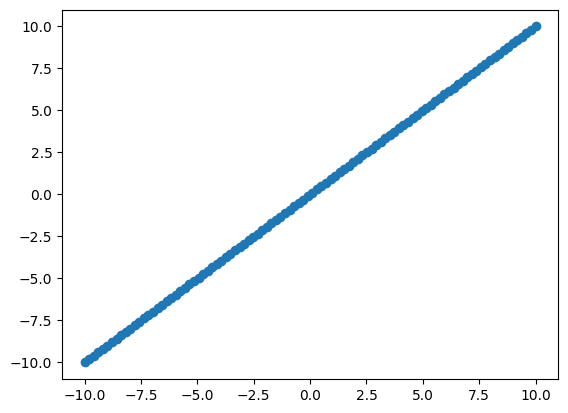

In [11]:
import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

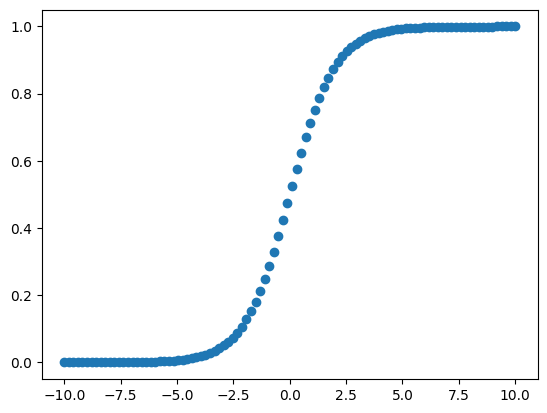

In [12]:
layer = keras.layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

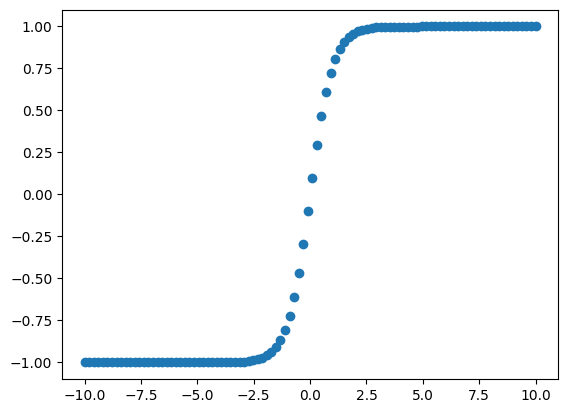

In [13]:
layer = keras.layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

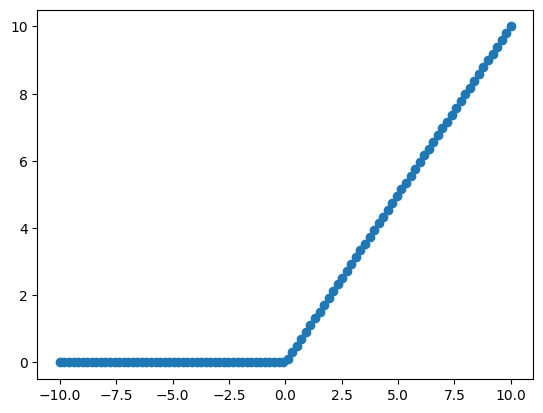

In [14]:
layer = keras.layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

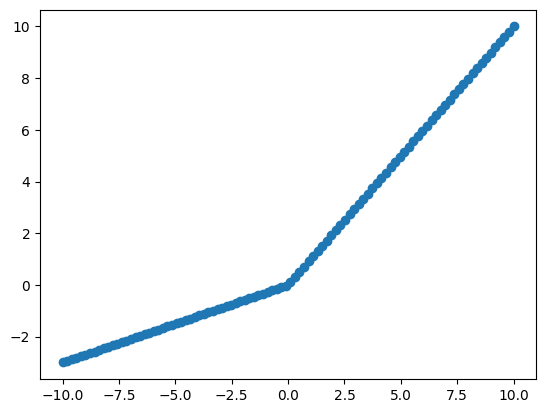

In [15]:
layer = keras.layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

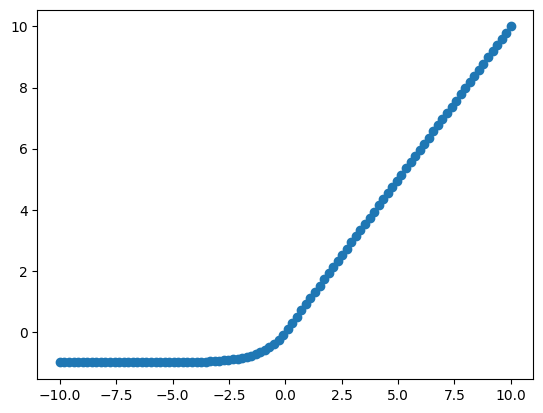

In [16]:
layer = keras.layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

In [17]:
inputs = keras.Input(shape=(28, 28, 1))
layer = keras.layers.Flatten(input_shape=(28, 28, 1))(inputs)
print(layer.shape)

(None, 784)


In [18]:
from tensorflow.keras import layers, models, utils

In [19]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 28, 100)              2900      ['input_7[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 28, 30)               3030      ['dense_9[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 28, 58)               0         ['input_7[0][0]',             
                                                                     'dense_10[0][0]']      

In [25]:
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input_2 (InputLayer)        [(None, 10, 28)]             0         []                            
                                                                                                  
 dense_12 (Dense)            (None, 10, 100)              2900      ['Input_2[0][0]']             
                                                                                                  
 Input_1 (InputLayer)        [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_13 (Dense)            (None, 10, 10)               1010      ['dense_12[0][0]']            
                                                                                            

In [26]:
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ (InputLayer)         [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 10, 100)              1100      ['input_[0][0]']              
                                                                                                  
 dense_15 (Dense)            (None, 10, 10)               1010      ['dense_14[0][0]']            
                                                                                                  
 main_output (Dense)         (None, 10, 1)                11        ['dense_15[0][0]']            
                                                                                            

In [27]:
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10, 28)]             0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 10, 100)              2900      ['input_2[0][0]']             
                                                                                                  
 input_1 (InputLayer)        [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_17 (Dense)            (None, 10, 10)               1010      ['dense_16[0][0]']            
                                                                                            

In [28]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
inputs = keras.Input(shape=(100,100,3), name= 'input layer')

# Flatten 레이어를 쌓으세요.
fln = layers.Flatten(input_shape=(100,100,3))(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
dns_1 = layers.Dense(400, activation='relu')(fln)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
dns_2 = layers.Dense(200, activation='relu')(dns_1)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
dns_3 = layers.Dense(100,activation='softmax')(dns_2)

model = models.Model(inputs = inputs, outputs=dns_3)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_18 (Dense)            (None, 400)               12000400  
                                                                 
 dense_19 (Dense)            (None, 200)               80200     
                                                                 
 dense_20 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12100700 (46.16 MB)
Trainable params: 12100700 (46.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten(input_shape=(100,100,3))
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation='relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation='relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation='softmax')

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([1, 100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
# data = tf.reshape((-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_21 (Dense)            multiple                  12000400  
                                                                 
 dense_22 (Dense)            multiple                  80200     
                                                                 
 dense_23 (Dense)            multiple                  20100     
                                                                 
Total params: 12100700 (46.16 MB)
Trainable params: 12100700 (46.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils

class MyModel(models.Model):
    def __init__(self, **kwargs):
        super(MyModel, self).__init__(**kwargs)

        self.input_layer1 = layers.Input(shape=(40,), name='input_layer1')
        self.input_layer2 = layers.Input(shape=(10,), name='input_layer2')

        self.dense_layer1 = layers.Dense(100, activation='relu')
        self.dense_layer2 = layers.Dense(100, activation='relu')
        self.dense_layer3 = layers.Dense(40, activation='relu')
        
        self.concatenate_layer = layers.Concatenate()
        
        self.output_layer1 = layers.Dense(1, activation='softmax')
        self.output_layer2 = layers.Dense(10, activation='softmax')

    def call(self, inputs):  
        input1, input2 = inputs

        a = self.dense_layer1(input1)
        b = self.dense_layer2(input2)
        x = self.concatenate_layer([a, b])
        s = self.output_layer1(x)
        m = self.dense_layer3(x)
        m = self.output_layer2(m)

        return m, s

# 모델 생성
model = MyModel()

# 입력 데이터 생성
input_data1 = tf.random.normal([1, 40])
input_data2 = tf.random.normal([1, 10])

# 모델 호출
outputs = model([input_data1,input_data2])

# 모델 요약
model.summary()


Model: "my_model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           multiple                  4100      
                                                                 
 dense_123 (Dense)           multiple                  1100      
                                                                 
 dense_124 (Dense)           multiple                  8040      
                                                                 
 concatenate_23 (Concatenat  multiple                  0         
 e)                                                              
                                                                 
 dense_125 (Dense)           multiple                  201       
                                                                 
 dense_126 (Dense)           multiple                  410       
                                                       

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils

input1 = tf.keras.Input(shape=(40,))
input2 = tf.keras.Input(shape=(10,))

dense_layer1 = layers.Dense(100, activation='relu')
dense_layer2 = layers.Dense(100, activation='relu')
dense_layer3 = layers.Dense(40, activation='relu')
concatenate_layer = layers.Concatenate()
output_layer1 = layers.Dense(1, activation='softmax')
output_layer2 = layers.Dense(10, activation='softmax')

a = dense_layer1(input1)
b = dense_layer2(input2)
x = concatenate_layer([a, b])
s = output_layer1(x)
m = dense_layer3(x)
m = output_layer2(m)

model = tf.keras.Model(inputs=[input1, input2], outputs=[m, s])

model.summary()
utils.plot_model(model, show_shapes=True)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 40)]                 0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 10)]                 0         []                            
                                                                                                  
 dense_112 (Dense)           (None, 100)                  4100      ['input_11[0][0]']            
                                                                                                  
 dense_113 (Dense)           (None, 100)                  1100      ['input_12[0][0]']            
                                                                                            

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils

class MyModel(models.Model):
    def __init__(self, **kwargs):
        super(MyModel, self).__init__(**kwargs)
        
        self.dense_layer1 = layers.Dense(100, activation='relu',output_shape=(100,))
        self.dense_layer2 = layers.Dense(100, activation='relu',output_shape=(100,))
        self.dense_layer3 = layers.Dense(40, activation='relu',output_shape=(40,))
        self.concatenate_layer = layers.Concatenate(output_shape=(200,))
        self.output_layer1 = layers.Dense(1, activation='softmax',output_shape=(1,))
        self.output_layer2 = layers.Dense(10, activation='softmax',output_shape=(10,))

    def call(self, x):
        x1, x2 = x

        x1 = self.dense_layer1(x1)
        x2 = self.dense_layer2(x2)
        
        x = self.concatenate_layer([x1, x2])
        
        x = self.output_layer1(x)
        x = self.dense_layer3(x)
        x = self.output_layer2(x)

        return x


model = MyModel()
model.build([(None, 40), (None, 10)])
model.summary()

TypeError: ('Keyword argument not understood:', 'output_shape')